![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)

# Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*

### Búsqueda de raíces en ecuaciones no lineales
___

Problema a resolver: Hallar $p$ tal que $f(p)=0,$ $p  \in [a,b].$



### Método de la Steffensen
___
A partir de los Métodos de las Aproximaciones Sucesivas y $\Delta^2$ de Aitken, podemos obtener el **Método de Steffensen**:

$$ x_{k+1}=x_k-\frac{(f(x_k))^2}{f(x_k+f(x_k))-f(x_k)}$$



### Ejemplo usando Steffensen
___
Hallar $p$ tal que $f(p)=0,$ $p  \in [10,100]$ siendo :
$$f(x)=\frac{9,80665\cdot 8^2}{2\cdot \pi}\cdot \tanh\left(\frac{2\cdot \pi\cdot 10}{x}\right)-x$$

Aplico el método de **Steffensen** con un valor inicial $x_0$=30.

In [1]:
import numpy as np #librería para operaciones algebraicas y numéricas
import pandas as pd #librería para manejo de datos

#programo el método Steffensen
def steff(x0, tol, itmax = 100): 
        #np.seterr('raise')
        df2 = pd.DataFrame(columns=('xcero','xuno'))
        x0 = x0
        contador = 0  
        x1 = x0-(f(x0))**2/(f(x0+f(x0))-f(x0))
        while (contador < itmax) and (abs((x1-x0)/x1) > tol):
            df2.loc[contador] = [x0,x1]
            x0 = x1                                                 
            x1 = x0-(f(x0))**2/(f(x0+f(x0))-f(x0))
            contador += 1  
        er=abs((x1-x0)/x1)
        print('El método de Steffensen convergió en',contador,'iteraciones, el resultado es:',x1,'y el error relativo es',er,'. La función es',f(x1),'.')
        return df2

In [2]:
#defino el valor inicial y la tolerancia

def f(x):#definimos la función con la que vamos a trabajar
    return (9.80665*8**2)/(2*np.pi)*np.tanh((2*np.pi*10/x))-x   #deben cambiar la función si quieren probar otra 

tolerancia=10**(-8)

ejemplo=steff(30, tolerancia)


El método de Steffensen convergió en 3 iteraciones, el resultado es: 70.88340808211349 y el error relativo es 2.9528808458570085e-11 . La función es -1.4210854715202004e-14 .


In [8]:
from IPython.display import display, Math
import sympy.printing as printing

xcero = ejemplo.xcero
xuno = ejemplo.xuno

print ("Analicemos las primeras iteraciones. \n")  

for p in range (3):
    print ("Iteración "+str(p)+": ")
    ec = "x_"+str(p)+"= "+str(xcero[p])+"\;y\; x_"+str(p+1)+"=x_"+str(p)+"-\\frac{(f(x_"+str(p)+"))^2}{f(x_"+str(p)+"+f(x_"+str(p)+"))-f(x_"+str(p)+")}"+"= "+str(xuno[p])
    display(Math(printing.latex(ec,mul_symbol='dot')))

Analicemos las primeras iteraciones. 

Iteración 0: 


<IPython.core.display.Math object>

Iteración 1: 


<IPython.core.display.Math object>

Iteración 2: 


<IPython.core.display.Math object>

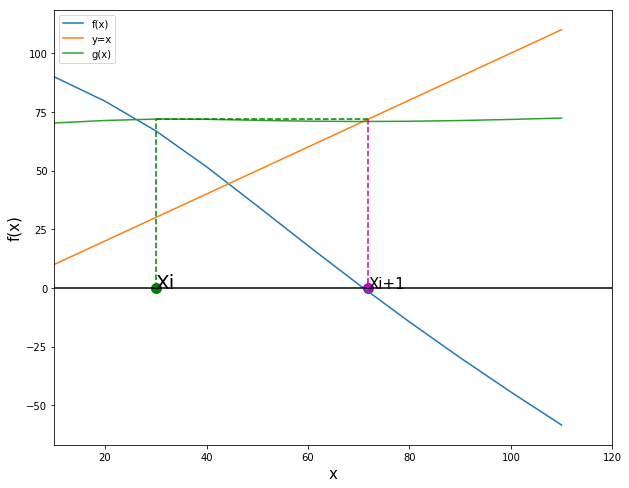

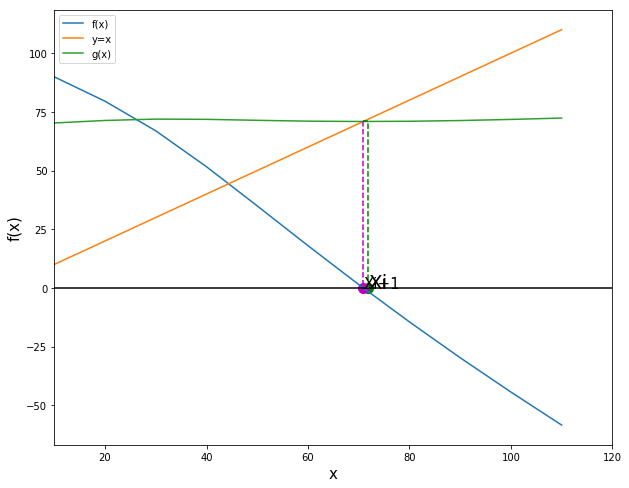

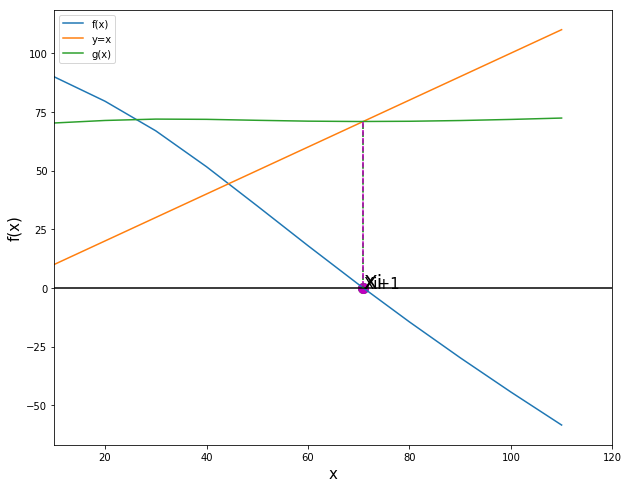

In [10]:
import matplotlib.pyplot as plt
ejex = np.arange(10, 120, 10);
y = f(ejex)

def i(x):#definimos la función =x
    return x

def g(x):
    return x-(f(x))**2/(f(x+f(x))-f(x))

for p in range (3):
    fig = plt.figure(figsize=(10,8))
    plt.plot(ejex, y)
    plt.xlabel('x',fontsize=15)
    plt.xlim(10,120)
    plt.ylabel('f(x)',fontsize=15)
    plt.plot(ejex, i(ejex))
    plt.plot(ejex, g(ejex))
    plt.axhline(y=0, color='k')   
    plt.scatter(x=xcero[p], y=0, marker="o", c='green', s=100)
    plt.annotate("Xi", (xcero[p], 0),fontsize=20)
    plt.plot([xcero[p],xcero[p]], [0,xuno[p]], color='g',linestyle='dashed')
    plt.plot([xcero[p],xuno[p]], [xuno[p],xuno[p]], color='g',linestyle='dashed')
    plt.scatter(x=xuno[p], y=0, marker="o", c='m', s=100)
    plt.annotate("Xi+1", (xuno[p], 0),fontsize=15)
    plt.legend(['f(x)','y=x','g(x)'],fontsize=10)
    plt.plot([xuno[p],xuno[p]], [xuno[p],0], color='m',linestyle='dashed')
    

In [9]:
print('Resumen de resultados para Steffensen:')
print('A continuación se muestran las primeras iteraciones:')
ejemplo.columns= ['Xi','Xi+1']
ejemplo.head(5)

Resumen de resultados para Steffensen:
A continuación se muestran las primeras iteraciones:


Xi       Xi+1
0  30.000000  71.907080
1  71.907080  70.884706
2  70.884706  70.883408

![Curso Schwarz-Sosa-Suriano](http://www.fi.uba.ar/sites/default/files/logo.png)



# GRACIAS POR SU ATENCIÓN



### Ecuaciones no Lineales - Tercera Parte

***

**Curso Schwarz - Sosa - Suriano**
- Métodos Numéricos. *Curso 2*
- Análisis Numérico I. *Curso 4*
- Métodos Matemáticos y Numéricos. *Curso 6*